## 🧠 JAN STRYSZEWSKI

We consider the **advection–diffusion equation**, which describes the transport and spreading of a scalar quantity (such as pollutant concentration, heat, or chemical concentration) in a one-dimensional medium due to both **bulk motion (advection)** and **random motion (diffusion)**:

$$
\frac{\partial C}{\partial t} + U \frac{\partial C}{\partial x} - D \frac{\partial^2 C}{\partial x^2} = 0
$$

Here:
- \( C(x, t) \) is the **concentration** at position \( x \) and time \( t \), with units of **kg/m³**
- \( U \) is the **advection velocity** (e.g., wind speed), in **m/s**
- \( D \) is the **diffusion coefficient**, in **m²/s**

This PDE models how a contaminant or substance evolves in time under both directed motion (advection) and random spreading (diffusion).

### 🔢 Initial Condition: Point Source Release

We assume an instantaneous point-source release at \( t = 0 \), mathematically modeled by a Dirac delta function:

$$
C(x, 0) = M \cdot \delta(x)
$$

Where \( M \) is the **total mass released** (in **kg**). This condition implies that all mass is initially concentrated at a single point.

### 🔣 Analytic Solution

Under this initial condition, the equation has a closed-form analytic solution:

$$
c(x,t) = \frac{M}{A} \cdot \frac{1}{2\sqrt{\pi D t}} \cdot \frac{x}{t^{3/2}} \cdot \exp\left(-\frac{(Ut - x)^2}{4Dt}\right)
$$

Where:
- \( A \) is a normalization area (e.g. cross-sectional area), in **m²**
- \( t > 0 \)

This solution captures both the **spreading** (Gaussian shape due to diffusion) and **shifting** (movement due to advection) of the concentration over time. The peak of the distribution travels with speed \( U \), while the width of the distribution increases with \( D \) and time \( t \).

### 📈 Physical Interpretation

- The exponential term ensures the concentration decays away from the peak.
- The $t^{-3/2}$ term causes the concentration to spread and diminish over time.
- The term $\frac{x}{t^{3/2}}$ gives the function its asymmetry, skewing the profile depending on the direction of flow.

### ⚖️ Units Check

All terms combine to give the final units of **kg/m³** (mass per unit volume), consistent with the interpretation of \( c(x,t) \) as a concentration.

This analytic solution is useful for validating numerical solvers or understanding contaminant transport in air, water, or other 1D media.



In [38]:
!pip install pint

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry

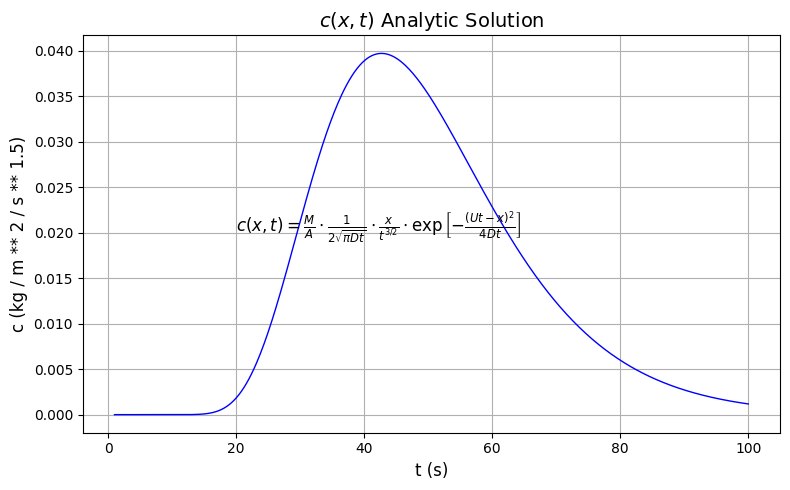

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry

ureg = UnitRegistry()
Q_ = ureg.Quantity

# Parameters (tuned to resemble the lecture slide)
U = Q_(0.95, "m/s")          # Wind speed
D = Q_(2.5, "m^2/s")       # Diffusion coefficient
M = Q_(2.0, "kg")           # Mass
A = Q_(0.2, "m**2")         # Cross-sectional area of diffusion

t_vals = Q_(np.linspace(1, 100, 500), "s")

x = Q_(50.0, "m")

def c_xt(x, t):
    coef = (M / A) / (2 * np.sqrt(np.pi * D * t))
    term = x / t**1.5
    exponent = np.exp(-((U * t - x)**2) / (4 * D * t))
    return coef * term * exponent



C_vals = c_xt(x, t_vals)


fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t_vals.magnitude, C_vals.magnitude, color='blue', linewidth=1)


ax.set_xlabel(f"t ({t_vals.units:~})", fontsize=12)
ax.set_ylabel(f"c ({C_vals.units:~})", fontsize=12)
ax.set_title(r"$c(x,t)$ Analytic Solution", fontsize=14)
ax.grid(True)


ax.text(20, 0.02, r"$c(x,t) = \frac{M}{A} \cdot \frac{1}{2\sqrt{\pi D t}} \cdot \frac{x}{t^{3/2}} \cdot \exp\left[ -\frac{(Ut - x)^2}{4 D t} \right]$",
        fontsize=12)

plt.tight_layout()
plt.show()
